In [96]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('joined_dataset.csv').sample(10000)

/Users/kellymarshall/opt/anaconda3/envs/big_data_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (13,14,15,16,17,18,25,26,27,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [164]:
before=df[df['year']==2019]
after= df[df['year']==2020]
eighteen=df[df['year']==2018]
now=others[others['year']==2021]

## Assesing foreign vs. domestic corporations

In [131]:
def foreign_domestic(data):
    data['is_domestic']=data['Entity Type'].map(lambda x: 'Domestic' if 'DOMESTIC' in x else 'Foreign')
    frequencies=data.groupby('is_domestic').size()
    plt.bar(list(frequencies.index),list(frequencies))
    plt.title('Foreign And Domestic Corporations')
    plt.ylabel('Number of Active Corporations')
    #plt.show()

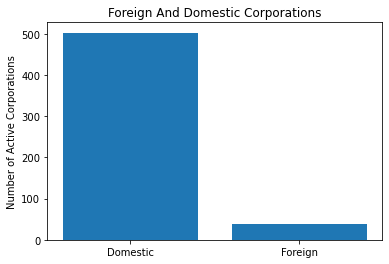

In [138]:
foreign_domestic(after)

## NYC vs. Everywhere else

In [139]:
df['is_NYC']

2665094     False
15640814    False
8067842     False
13960851     True
12374244    False
            ...  
12186496    False
14069817    False
13898360     True
13753943    False
2177079      True
Name: is_NYC, Length: 10000, dtype: bool

In [140]:
loc_freqs=df.groupby('is_NYC').size()
loc_freqs

is_NYC
False    7204
True     2796
dtype: int64

In [141]:
def nyc_else(data):
    nyc=['richmond','new york','richmond','queens','bronx']
    df['is_NYC']=df['County'].map(lambda x:x in nyc)
    loc_freqs=df[['is_NYC',''].groupby('is_NYC').size()
    print(loc_freqs)
    loc_freqs.plot.bar()
    plt.title('Inside and Outside New York')
    plt.ylabel('Number of Active Corporations')

is_NYC
False    7204
True     2796
dtype: int64


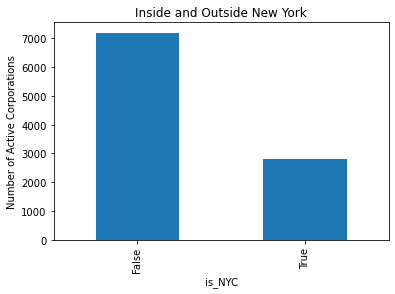

In [142]:
nyc_else(before)

In [143]:
after['DOS ID'].unique().size

541

## Overall businesses

<AxesSubplot:xlabel='month'>

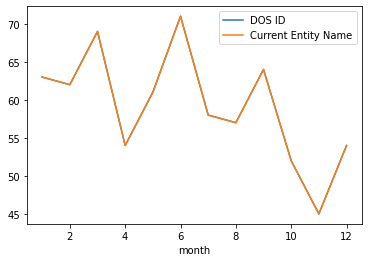

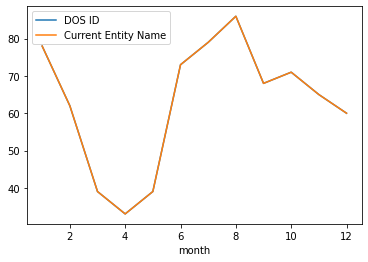

In [153]:
before[['month','DOS ID','Current Entity Name']].groupby('month').nunique().plot()
after[['month','DOS ID','Current Entity Name']].groupby('month').nunique().plot()

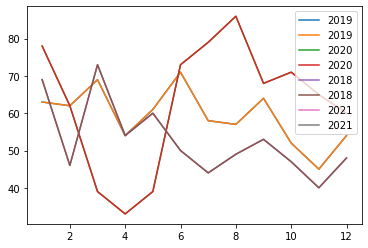

In [165]:
plt.plot(before[['month','DOS ID','Current Entity Name']].groupby('month').nunique(),label=2019)
plt.plot(after[['month','DOS ID','Current Entity Name']].groupby('month').nunique(), label=2020)
plt.plot(eighteen[['month','DOS ID','Current Entity Name']].groupby('month').nunique(), label=2018)
plt.plot(now[['month','DOS ID','Current Entity Name']].groupby('month').nunique(), label=2021)
plt.legend()
plt.show()

In [168]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

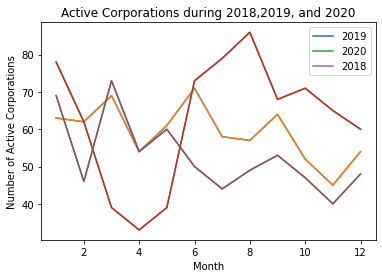

In [176]:
fig, ax = plt.subplots()
ax.plot(before[['month','DOS ID','Current Entity Name']].groupby('month').nunique(),label=2019)
ax.plot(after[['month','DOS ID','Current Entity Name']].groupby('month').nunique(), label=2020)
ax.plot(eighteen[['month','DOS ID','Current Entity Name']].groupby('month').nunique(), label=2018)
ax.legend()
ax.set_title('Active Corporations during 2018,2019, and 2020')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Active Corporations')
legend_without_duplicate_labels(ax)

## Group by County

In [185]:
before[['County','Current Entity Name','Month']].groupby(['County','Month']).nunique()

Current Entity Name
County      Month                     
albany      1                        4
            2                        6
            3                        5
            4                        3
            5                        6
...                                ...
westchester 9                        6
            10                       4
            11                       4
            12                       5
yates       7                        1

[174 rows x 1 columns]